**"Разработка модели классификации патологий по снимкам"**

Кузьмин Олег 2023.12.06 - 2023.09.13 (01-я неделя).

  



### Техническое задание

Техническое Задание для проекта стажировки
1. Введение
Цель проекта - создание продукта с использованием искусственного интеллекта для диагностики и лечения заболеваний ВНЧС, с использованием методов машинного обучения и нейронных сетей.
2. Задачи проекта
2.1. Обработка и анализ КЛКТ и МРТ снимков
- С использованием библиотеки Pydicom, провести загрузку и обработку КЛКТ и МРТ снимков в формате DICOM.
- Применив модели машинного обучения и базу TensorFlow и Keras для выявления патологий челюстных костей на основе анализа данных снимков.
2.2. Создание системы классификации и фреймворка предсказания
- Сформировать модель классификации патологий, основанную на архитектуре сверточных нейронных сетей с использованием Keras.
- Разработать механизм определения геометрии патологий с использованием анализа изображений OpenCV.
2.3. Разработка системы представления результатов
- Создание простого веб-интерфейса с помощью FastAPI или развертывание телеграм-бота для взаимодействия пользователя с системой и получения результатов анализа КЛКТ и МРТ снимков.
2.4. Интеграция разработанной системы в рабочий процесс клиники
- Интегрировать разработанное решение в привычный рабочий процесс клиники с использованием библиотек для обслуживания модели.
3. Методы разметки
 - labelImg, Roboflow, CVAT AI, Labelbox, VGG Image Annotator (VIA), COCO Annotator, Supervise.ly,
4. Время и среда работы
- Длительность проекта: 3 месяца.
- Среда разработки: Google Colaboratory
5. Заключение
Разработанный продукт должен обеспечивать эффективную аналитику снимков для диагностики заболеваний ВНЧС и формировать дальнейший план действий для изготовления последнего элайнера, используя взаимодействие ИИ и человеческого специалиста.

Ссылка на ТЗ от клиники:
https://docs.google.com/presentation/d/17oEmE4xG3jhlg64gDHrHICy1_i2XjoUn/edit?usp=sharing&ouid=104431004874051483278&rtpof=true&sd=true

## Загрузка приложений

In [2]:
import numpy as np # Подключаем библиотеку numpy
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist                                     # pагрузка базы ч/б картинок размером 28х28 пикселей с названием Mnist/KERAS
from tensorflow.keras.datasets import mnist, fashion_mnist                      # загружаем готовые базы mnist

from tensorflow.keras import utils                                              # eтилиты для to_categorical
from sklearn.model_selection import train_test_split                            # модуль разбивки выборки на тренировочную/тестовую
from sklearn.preprocessing import StandardScaler                                # модуль стандартизации данных

from tensorflow.keras.models import Model, Sequential                           # подлючаем модуль создания модели НС Sequential и Modsl
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
                                                                                # подключаем модуль создания полносвязных слоев Dense
from tensorflow.keras.optimizers import Adam                                    # подключаем оптимизатор Adam

from tensorflow.keras.preprocessing import image                                # для отрисовки изображения
import pylab                                                                    # модуль построения графиков
from mpl_toolkits.mplot3d import Axes3D                                         # модуль трехмерной графики
import matplotlib.pyplot as plt                                                 # отрисовка изображений
from PIL import Image                                                           # отрисовка изображений
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
                                                                                # отрисовывать изображения в ноутбуке, а не в консоль или файk

import os
from google.colab import files                                                  # для загрузки своей картинки
from tensorflow.keras import backend as K                                       # подтягиваем базовые керасовские функции
from tensorflow.keras.callbacks import LambdaCallback
from google.colab import drive                                                  # модуль для работы с google диском
import time, random
import zipfile                      # Для начала нам нужно импортировать модуль zipfile:

In [13]:
p_list

array(['PR1_norm', 'PR1_later', 'PR1_medial', 'PR2_norm', 'PR2_kompres',
       'PR2_distrak', 'PR2_dictal', 'PR2_mezial', 'PR3_norm',
       'PR3_kompres', 'PR3_distrak', 'PR3_later', 'PR3_medial'],
      dtype=object)

In [18]:
PR_dist = {'PR1_norm':'Центральное положение суставной головки Нормально',
          'PR1_later':'Латеральное положение суставной головки ',
          'PR1_medial':'Медиальное положение суставной головки',
          'PR2_norm':'Центральное положение суставной головки Нормально',
          'PR2_kompres':'Компрессия. Сужение суставной щели',
          'PR2_distrak':'Дистракция. Расширение суставной щели',
          'PR2_dictal':'Дистальное положение суставной головки',
          'PR2_mezial': 'Мезиальное положение суставной головки',
          'PR3_norm':'Центральное положение суставной головки Нормально',
          'PR3_kompres': 'Компрессия. Сужение суставной щели',
          'PR3_distrak':'Дистракция. Расширение суставной щели ',
          'PR3_later':'Лотеральное положение суставной головки',
          'PR3_medial':'Медиальное положение суставной головки'}

In [38]:
LaPa = ['l<', 'l>', 'l^', 'lv', 'p<', 'p>', 'p^', 'pv']

## PR1 Аксиальная проекция

### Центральное положение суставной головки. Норма

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR1_norm.zip'             # путь к архиву
norm = zipfile.ZipFile(zip_file, 'r')                           # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
norm.extractall('/content/drive/MyDrive/BD/PR1_norm/')          # достаем все файлы из архива и пишем в папку PR1_norm
norm_list = os.listdir('/content/drive/MyDrive/BD/PR1_norm')    # составим список всех файлов в папке PR1_norm
print('Кол-во файлов в папке', len(norm_list))
#norm_list


Кол-во файлов в папке 224


In [ ]:
norm_list[97:116]

['è99ïá.jpg',
 'è100ïá.jpg',
 'è100Åá.jpg',
 'è101ïá.jpg',
 'è102ïá.jpg',
 'è103ïá.jpg',
 'è104Åá.jpg',
 'è105Åá.jpg',
 'è106ïá.jpg',
 'è106Åá.jpg',
 'è107ïá.jpg',
 'è107Åá.jpg',
 'è108ïá.jpg',
 'è108Åá.jpg',
 'è109ïá.jpg',
 'è109Åá.jpg',
 'è110ïá.jpg',
 'è110Åá.jpg',
 'è111ïá.jpg']

### Латеральное положение суставной головки

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR1_later.zip'             # путь к архиву
later = zipfile.ZipFile(zip_file, 'r')                           # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
later.extractall('/content/drive/MyDrive/BD/PR1_later/')          # достаем все файлы из архива и пишем в папку PR1_later
later_list = os.listdir('/content/drive/MyDrive/BD/PR1_later')    # составим список всех файлов в папке PR1_later
print('Кол-во файлов в папке', len(later_list))
#later_list


Кол-во файлов в папке 225


In [ ]:
later_list[76:81]

['è99Åá.jpg',
 'è101Åá.jpg',
 'è104ïá.jpg',
 'è105ïá.jpg',
 'è113ïá.jpg']

### Медиальное положение суставной головки

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR1_media.zip'             # путь к архиву
media = zipfile.ZipFile(zip_file, 'r')                           # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
media.extractall('/content/drive/MyDrive/BD/PR1_media/')          # достаем все файлы из архива и пишем в папку PR1_media
media_list = os.listdir('/content/drive/MyDrive/BD/PR1_media')    # составим список всех файлов в папке PR1_media
print('Кол-во файлов в папке', len(media_list))
#media_list


Кол-во файлов в папке 54


In [ ]:
media_list[30:34]

['è92ïá.jpg', 'è102Åá.jpg', 'è103Åá.jpg', 'è116ïá.jpg']

## PR2 Сагитальная проекция

### Центральное положение суставной головки. Норма

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR2_norm.zip'             # путь к архиву
norm = zipfile.ZipFile(zip_file, 'r')                           # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
norm.extractall('/content/drive/MyDrive/BD/PR2_norm/')          # достаем все файлы из архива и пишем в папку PR1_norm
norm_list = os.listdir('/content/drive/MyDrive/BD/PR2_norm')    # составим список всех файлов в папке PR1_norm
print('Кол-во файлов в папке /BD/PR2_norm/', len(norm_list))
#norm_list


Кол-во файлов в папке /BD/PR2_norm/ 69


In [ ]:
norm_list[30:35]

['è99ïß.jpg', 'è104ïß.jpg', 'è104Åß.jpg', 'è110ïß.jpg', 'è111ïß.jpg']

### Компрессия. Сужение суставной щели

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR2_kompres.zip'                # путь к архиву
kompres = zipfile.ZipFile(zip_file, 'r')                              # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
kompres.extractall('/content/drive/MyDrive/BD/PR2_kompres/')          # достаем все файлы из архива и пишем в папку PR1_kompres
kompres_list = os.listdir('/content/drive/MyDrive/BD/PR2_kompres')    # составим список всех файлов в папке PR2_kompres
print('Кол-во файлов в папке', len(kompres_list))
#kompres_list


Кол-во файлов в папке 231


In [ ]:
kompres_list[92:106]

['è99Åß.jpg',
 'è100ïß.jpg',
 'è100Åß.jpg',
 'è101Åß.jpg',
 'è102ïß.jpg',
 'è102Åß.jpg',
 'è103ïß.jpg',
 'è103Åß.jpg',
 'è108ïß.jpg',
 'è108Åß.jpg',
 'è109ïß.jpg',
 'è109Åß.jpg',
 'è110Åß.jpg',
 'è112ïß.jpg']

### Дистракция. Расширение суставной щели

In [ ]:
#zip_file = '/content/drive/MyDrive/BD/PR2_distrak.zip'             # путь к архиву
#distrak = zipfile.ZipFile(zip_file, 'r')                           # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
#distrak.extractall('/content/drive/MyDrive/BD/PR2_distrak/')          # достаем все файлы из архива и пишем в папку PR1_distrak
distrak_list = os.listdir('/content/drive/MyDrive/BD/PR2_distrak')    # составим список всех файлов в папке PR2_distrak
print('Кол-во файлов в папке', len(distrak_list))
#distrak_list


Кол-во файлов в папке 67


In [ ]:
print('Нет пациентов с номерами от 100 до 110')

Нет пациентов с номерами от 100 до 110


### Дистальное положение суставной головки.

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR2_dictal.zip'                # путь к архиву
dictal = zipfile.ZipFile(zip_file, 'r')                              # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
dictal.extractall('/content/drive/MyDrive/BD/PR2_dictal/')          # достаем все файлы из архива и пишем в папку PR1_dictal
dictal_list = os.listdir('/content/drive/MyDrive/BD/PR2_dictal')    # составим список всех файлов в папке PR2_dictal
print('Кол-во файлов в папке', len(dictal_list))
#dictal_list


Кол-во файлов в папке 199


In [ ]:
dictal_list[60:70]

['è95Åß.jpg',
 'è101ïß.jpg',
 'è101Åß.jpg',
 'è103ïß.jpg',
 'è103Åß.jpg',
 'è105ïß.jpg',
 'è105Åß.jpg',
 'è106ïß.jpg',
 'è106Åß.jpg',
 'è116ïß.jpg']

### Мезиальное положение суставной головки.

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR2_mezial.zip'                # путь к архиву
mezial = zipfile.ZipFile(zip_file, 'r')                              # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
mezial.extractall('/content/drive/MyDrive/BD/PR2_mezial/')          # достаем все файлы из архива и пишем в папку PR1_mezial
mezial_list = os.listdir('/content/drive/MyDrive/BD/PR2_mezial')    # составим список всех файлов в папке PR2_mezial
print('Кол-во файлов в папке', len(mezial_list))
#mezial_list


Кол-во файлов в папке 102


In [ ]:
mezial_list[41:45]

['è97Åß.jpg', 'è107ïß.jpg', 'è107Åß.jpg', 'è115ïß.jpg']

## PR3 Корональная проекция

### Центральное положение суставной головки. Норма

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR3_norm.zip'             # путь к архиву
norm = zipfile.ZipFile(zip_file, 'r')                           # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
norm.extractall('/content/drive/MyDrive/BD/PR3_norm/')          # достаем все файлы из архива и пишем в папку PR3_norm
norm_list = os.listdir('/content/drive/MyDrive/BD/PR3_norm')    # составим список всех файлов в папке PR3_norm
print('Кол-во файлов в папке /BD/PR3_norm/', len(norm_list))
#norm_list


Кол-во файлов в папке /BD/PR3_norm/ 161


In [ ]:
norm_list[67:80]

['è99Å¬.jpg',
 'è100ï¬.jpg',
 'è102ï¬.jpg',
 'è102Å¬.jpg',
 'è103ï¬.jpg',
 'è103Å¬.jpg',
 'è104Å¬.jpg',
 'è106ï¬.jpg',
 'è107ï¬.jpg',
 'è107Å¬.jpg',
 'è109ï¬.jpg',
 'è110ï¬.jpg',
 'è111ï¬.jpg']

### Компрессия. Сужение суставной щели

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR3_kompres.zip'                # путь к архиву
kompres = zipfile.ZipFile(zip_file, 'r')                              # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
kompres.extractall('/content/drive/MyDrive/BD/PR3_kompres/')          # достаем все файлы из архива и пишем в папку PR3_kompres
kompres_list = os.listdir('/content/drive/MyDrive/BD/PR3_kompres')    # составим список всех файлов в папке PR3_kompres
print('Кол-во файлов в папке', len(kompres_list))
#kompres_list


Кол-во файлов в папке 132


In [ ]:
kompres_list[44:52]

['è95Å¬.jpg',
 'è100Å¬.jpg',
 'è104ï¬.jpg',
 'è108ï¬.jpg',
 'è108Å¬.jpg',
 'è109Å¬.jpg',
 'è110Å¬.jpg',
 'è114Å¬.jpg']

### Дистракция. Расширение суставной щели

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR3_distrak.zip'             # путь к архиву
distrak = zipfile.ZipFile(zip_file, 'r')                           # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
distrak.extractall('/content/drive/MyDrive/BD/PR3_distrak/')          # достаем все файлы из архива и пишем в папку PR3_distrak
distrak_list = os.listdir('/content/drive/MyDrive/BD/PR3_distrak')    # составим список всех файлов в папке PR3_distrak
print('Кол-во файлов в папке', len(distrak_list))
#distrak_list


Кол-во файлов в папке 46


In [ ]:
print('Нет пациентов с номерами от 100 до 110')

Нет пациентов с номерами от 100 до 110


### Латеральное положение суставной головки.

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR3_later.zip'                # путь к архиву
later = zipfile.ZipFile(zip_file, 'r')                              # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
later.extractall('/content/drive/MyDrive/BD/PR3_later/')          # достаем все файлы из архива и пишем в папку PR3_later
later_list = os.listdir('/content/drive/MyDrive/BD/PR3_later')    # составим список всех файлов в папке PR3_later
print('Кол-во файлов в папке', len(later_list))
#later_list


Кол-во файлов в папке 205


In [ ]:
later_list[102:107]

['è97Å¬.jpg', 'è101ï¬.jpg', 'è105ï¬.jpg', 'è105Å¬.jpg', 'è115ï¬.jpg']

### Мезиальное положение суставной головки.

In [ ]:
zip_file = '/content/drive/MyDrive/BD/PR3_medial.zip'                # путь к архиву
medial = zipfile.ZipFile(zip_file, 'r')                              # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
medial.extractall('/content/drive/MyDrive/BD/PR3_medial/')          # достаем все файлы из архива и пишем в папку PR3_medial
medial_list = os.listdir('/content/drive/MyDrive/BD/PR3_medial')    # составим список всех файлов в папке PR3_medial
print('Кол-во файлов в папке', len(medial_list))
#medial_list


Кол-во файлов в папке 25


In [ ]:
medial_list[4:7]

['è60Å¬.jpg', 'è106Å¬.jpg', 'è117Å¬.jpg']

## Загрузка снимков jpg

Код из словаря операторов

In [ ]:
#zip_file = '/content/drive/MyDrive/Colab Notebooks/ДЗ 16 Автокодировщики /facez.zip'             # путь к архиву
#norm = zipfile.ZipFile(zip_file, 'r')                        # откроем ZIP-архив с помощью функции ZipFile и сохранить его в переменную:
#norm.extractall('/content/drive/MyDrive/BD/--------/')       # достаем все файлы из архива и пишем в папку Facez

images_dir = '/content/drive/MyDrive/BD/PR1_norm'             # зададим имя папки в которую распоковали изображения
norm_list = os.listdir('/content/drive/MyDrive/BD/PR1_norm')  # составим список всех файлов в папке PR1_norm
print('Кол-во файлов в папке', len(norm_list))
#norm_list



Кол-во файлов в папке 224


In [ ]:
print('Смотрим название файла из списка', norm_list[211])
print('Переводим файл из jpg формата в np массив')
pch = os.path.join(images_dir, norm_list[211])                       # Соберем полный путь к очередному файлу
wq = image.load_img('/content/drive/MyDrive/BD/PR1_norm/è240Åá.jpg') # Загружаем изображение с помощью image.load_img()
wq_np = image.img_to_array(wq)                                       # переводим изображение в numpy массив
print('Тип переменной', type(wq_np))
print('Размер np-изображения',wq_np.shape)

Смотрим название файла из списка è240Åá.jpg
Переводим файл из jpg формата в np массив
Тип переменной <class 'numpy.ndarray'>
Размер np-изображения (603, 976, 3)


In [ ]:
img_height = 603                                              # зададим высоту изображений
img_width = 976                                               # зададим ширину избражений

def load_images(norm_list, img_height, img_width):
  ''' Функция загрузки изображений
      Вход: передаем список распакованых в папку Facez файлов из zip архива
      высоту и ширину картинки к которой будут преобразованы загружаемые изображения
  '''
  list_images = []                                           # создаем пустой список в который будем загружать изображения
  for img in norm_list:                                      # цикл по списку распакованных файлов
    pch = os.path.join(images_dir, img)                      # соберем полный путь к очередному файлу

    wq = image.load_img(pch, target_size=(img_height, img_width), color_mode='grayscale') # Загружаем изображение с помощью image.load_img(), конвертируя его в нужный формат
                                                                                          # подаем на вход: 1. путь к файлу 2. размер получаемой картинки. 3.цветовую гамму
    list_images.append(image.img_to_array(wq)/255)           # нормируем изображение в диапазон от 0 до 1 и записываем в список
    norm_np =  np.array(list_images)                         # переводим список изображений в numpy массив

  return norm_np                                             # возвращаем numpy массив загруженных избражений

Переведем все файлы из списка в np массив

In [ ]:
cur_time = time.time()
xTrain_imag = load_images(norm_list, img_height, img_width)  # загрузим избражения лиц с задаными размерами картинки
print ('Время загрузки: ', round(time.time()-cur_time, 2), 'с', sep='')
print('Размерность массива', xTrain_imag.shape)              # выведем размерность массива

Время загрузки: 30.47с
Размерность массива (224, 603, 976, 1)


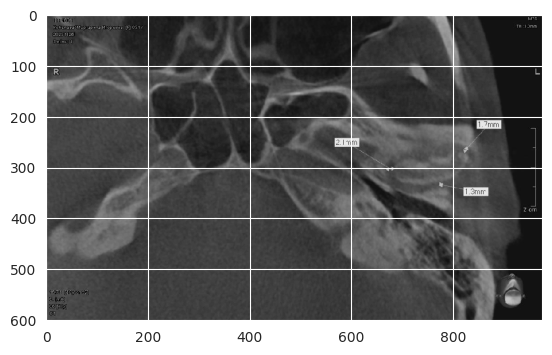

In [ ]:
plt.imshow(xTrain_imag[np.random.randint(0, xTrain_imag.shape[0])].reshape(img_height,img_width), cmap='gray') # выведем случайное изображение
plt.show()

# Работа с табличными данными


## таблица пациентов


In [21]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Стажировка 3/Пациенты.xlsx'
df_pac = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
pac_list = df_pac.columns.to_list()
print(pac_list)
print(df_pac.shape)
df_pac[99:111]

['ID', 'Пациенты', 'Доктор']
(310, 3)


,ID,Пациенты,Доктор
99,К100,Кобелева М.И.,Алина
100,К101,Смирнов Б.С. 23.01.2023,Инга
101,К102,Созыкина Е.С. 02.04.2023,Инга
102,К103,Созыкина Е.С. 15.09.2023,Инга
103,К104,Соколов Э.С.,Инга
104,К105,Бобрышева Л.В.,Кристина
105,К106,Богданов Р.С. 22.12.2022,Кристина
106,К107,Кобцев А.А.,Алина
107,К108,Ковнацкий С.А. 15.10.2023,Алина
108,К109,Ковнацкий С.А. 24.08.2023,Алина


In [22]:
pac_list

['ID', 'Пациенты', 'Доктор']

In [25]:
ka = 'К100'
a = df_pac.loc[df_pac.ID == ka, 'Пациенты']
b = df_pac.loc[df_pac.ID == ka, 'Доктор']
#print('a', a)
#print(a[99])
print('Пациент', a.iloc[0])
print('Доктор ', b.iloc[0])

Пациент Кобелева М.И.
Доктор  Алина 


## obraz

In [26]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Стажировка 3/obraz.xlsx'
df_com = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_com.shape)
df_com

(7, 9)


,ID,PR1_norm_La<,PR1_norm_La>,PR1_norm_La^,PR1_norm_Lav,PR1_norm_Pa<,PR1_norm_Pa>,PR1_norm_Pa^,PR1_norm_Pav
0,КА100,4.5,1.9,3.1,1.5,2.1,4.5,4.0,1.8
1,КА101,3.1,2.1,NaN,NaN,NaN,NaN,NaN,NaN
2,КА102,1.4,1.7,NaN,NaN,NaN,NaN,NaN,NaN
3,КА103,1.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN
4,КА104,NaN,NaN,NaN,NaN,1.2,2.3,NaN,NaN
5,КА105,NaN,NaN,NaN,NaN,2.9,3.3,NaN,NaN
6,КА106,2.7,1.8,NaN,NaN,3.3,3.1,NaN,NaN


In [27]:
df_list = df_com.columns.to_list()
df_list

['ID ',
 'PR1_norm_La<',
 'PR1_norm_La>',
 'PR1_norm_La^',
 'PR1_norm_Lav',
 'PR1_norm_Pa<',
 'PR1_norm_Pa>',
 'PR1_norm_Pa^',
 'PR1_norm_Pav']

## karta ID

In [28]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Стажировка 3/Karta_ID.xlsx'
df_karta = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_karta.shape)
p_list = df_karta['proekc'].unique()
print('p_list',p_list)
k_list = df_karta.columns.to_list()
df_karta

(13, 11)
p_list ['PR1_norm' 'PR1_later' 'PR1_medial' 'PR2_norm' 'PR2_kompres'
 'PR2_distrak' 'PR2_dictal' 'PR2_mezial' 'PR3_norm' 'PR3_kompres'
 'PR3_distrak' 'PR3_later' 'PR3_medial']


,ID,proekc,l/p,l<,l>,l^,lv,p<,p>,p^,pv
0,КА100,PR1_norm,La/Pa,4.5,1.9,3.1,1.5,2.1,4.5,4.0,1.8
1,КА100,PR1_later,La/Pa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,КА100,PR1_medial,La/Pa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,КА100,PR2_norm,Lc/Pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,КА100,PR2_kompres,Lc/Pc,2.3,1.9,2.2,NaN,1.8,1.9,1.9,NaN
5,КА100,PR2_distrak,Lc/Pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,КА100,PR2_dictal,Lc/Pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,КА100,PR2_mezial,Lc/Pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,КА100,PR3_norm,Lk/Pk,2.0,1.1,1.8,NaN,NaN,NaN,NaN,NaN
9,КА100,PR3_kompres,Lk/Pk,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN


In [29]:
k_list   # смотрим список столбцов карты пациента

['ID ', 'proekc', 'l/p', 'l<', 'l>', 'l^', 'lv', 'p<', 'p>', 'p^', 'pv']

## 2.3 Разработка системы представления результатов

In [30]:
rem_mns = df_karta.dropna(axis=0, how='all', subset=k_list[3:])
                                      #  axis = 0 - удаляем построчно,
                                      #  axis = 1 выкидываем столбец;
                                      #  how ='any' - выкидываем, если есть хотя бы одна ячейка пустая.
                                      #  how = 'all' - выкидываем, если есть полностью пустая строка или столбец

rem_mns

,ID,proekc,l/p,l<,l>,l^,lv,p<,p>,p^,pv
0,КА100,PR1_norm,La/Pa,4.5,1.9,3.1,1.5,2.1,4.5,4.0,1.8
4,КА100,PR2_kompres,Lc/Pc,2.3,1.9,2.2,NaN,1.8,1.9,1.9,NaN
8,КА100,PR3_norm,Lk/Pk,2.0,1.1,1.8,NaN,NaN,NaN,NaN,NaN
9,КА100,PR3_kompres,Lk/Pk,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN


In [31]:
list_rem_mns = rem_mns ['proekc'].unique()
list_rem_mns

array(['PR1_norm', 'PR2_kompres', 'PR3_norm', 'PR3_kompres'], dtype=object)

In [32]:
list_proekc = rem_mns ['proekc'].unique()
list_proekc

array(['PR1_norm', 'PR2_kompres', 'PR3_norm', 'PR3_kompres'], dtype=object)

## Результаты анализа КЛКТ и МРТ снимков

In [59]:
def rez (df_pac, rem_mns, list_rem_mns):
  a = df_pac.loc[df_pac.ID == ka, 'Пациенты']
  b = df_pac.loc[df_pac.ID == ka, 'Доктор']
  print('Пациент', a.iloc[0])
  print('Доктор ', b.iloc[0])
  print('Результаты анализа КЛКТ и МРТ снимков')
  print('Список столбцов - замеров',' '*23,LaPa)
  #print(list_rem_mns)
  for i in list_proekc:
    #print(i)
    PR = i
    c = rem_mns.loc[rem_mns.proekc == PR, ['l<', 'l>', 'l^', 'lv', 'p<', 'p>', 'p^', 'pv']]
    C = c.iloc[0,:]
    list_C = list(C)
    #print(PR_dist[i])
    print(PR_dist[i],list_C)
    #print(list_C)
  #print(list_C )
  return

In [60]:
rez (df_pac, rem_mns, list_rem_mns)

Пациент Кобелева М.И.
Доктор  Алина 
Результаты анализа КЛКТ и МРТ снимков
Список столбцов - замеров                         ['l<', 'l>', 'l^', 'lv', 'p<', 'p>', 'p^', 'pv']
Центральное положение суставной головки Нормально [4.5, 1.9, 3.1, 1.5, 2.1, 4.5, 4.0, 1.8]
Компрессия. Сужение суставной щели [2.3, 1.9, 2.2, nan, 1.8, 1.9, 1.9, nan]
Центральное положение суставной головки Нормально [2.0, 1.1, 1.8, nan, nan, nan, nan, nan]
Компрессия. Сужение суставной щели [nan, nan, nan, nan, 1.0, 3.0, 2.0, nan]
